In [1]:
import json

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import numpy as np

In [3]:
import extrai_descritor as ed
import escreve_xlsx as es

In [4]:
# path = "C:\\saida_teste\\relatorio_json_atualizado.xlsx"
# path = "C:\\saida_teste\\dados_reais_2kamostras.xlsx"
path = "C:\\saida_teste\\dados_reais_2kamostras_novo_algo_categorias.xlsx" 
def get_dados(path):
    with open(path + ".txt", 'r') as file:
        text = file.read()
    
    text = text.replace("\'", "\"")
    text = text.replace("nan", "\"nan\"")
    data = json.loads(text)
    return data
# data


with open('data.json', 'w') as f:
    data = get_dados(path)
    f.write(json.dumps(data))

In [5]:
dic = ed.get_descritores(data)

In [6]:
dic

{'ls_cat': ['Swimming',
  'Immobility',
  'Climbing',
  'Diving',
  'Headshaking',
  'Undefined',
  'Undefined (frames that are not marked)',
  'Catalog'],
 'ls_descritor': ['kappa', 'prevalencia', 'vies'],
 'Swimming': {'cat': 'Swimming',
  'kappa': {'descritor': 'kappa',
   'd_measured_m': 0.85178,
   'd_measured_max': 0.968464,
   'ci_m': array([0.834288, 0.86482 ]),
   'ci_max': array([0.98556, 1.     ]),
   'd': 23.649563166537046,
   'd_ls_m': [0.857959,
    0.857959,
    0.857959,
    0.857959,
    0.857959,
    0.850713,
    0.850713,
    0.850713,
    0.850713,
    0.850713,
    0.838303,
    0.838303,
    0.838303,
    0.838303,
    0.838303,
    0.853765,
    0.853765,
    0.853765,
    0.853765,
    0.853765,
    0.844185,
    0.844185,
    0.844185,
    0.844185,
    0.844185,
    0.855862,
    0.855862,
    0.855862,
    0.855862,
    0.855862,
    0.856882,
    0.856882,
    0.856882,
    0.856882,
    0.856882,
    0.86228,
    0.86228,
    0.86228,
    0.86228,
    0.8

In [7]:
def test_ci_separado(ci_m, ci_max):
    # ca = comeca antes
    # cd = comeca depois
    # ta = termina antes
    r_menor_ca_ta = ci_m[1]   < ci_max[0]
    r_menor_cd_td = ci_max[1] < ci_m[0]
#     r_menor_ca_ta = ci_m[0] <= ci_max[0] and ci_max[1] >= ci_m[1]
#     r_menor_cd_ta = ci_m[0] >= ci_max[0] and ci_max[1] >= ci_m[1]
    
#     r_menor_ca_td = ci_m[0] <= ci_max[0] and ci_max[1] <= ci_m[1]
#     r_menor_cd_td = ci_m[0] >= ci_max[0] and ci_max[1] <= ci_m[1]
    return r_menor_ca_ta or r_menor_cd_td

In [8]:
for descritor in dic['ls_descritor']:
    for cat in dic['ls_cat']:
        print(descritor, cat, dic[cat][descritor]['d_measured_m'], dic[cat][descritor]['d_measured_max'],
             dic[cat][descritor]['ci_m'],
             dic[cat][descritor]['ci_max'],
             test_ci_separado(dic[cat][descritor]['ci_m'], dic[cat][descritor]['ci_max']),
             dic[cat][descritor]['d'])



kappa Swimming 0.85178 0.968464 [0.834288 0.86482 ] [0.98556 1.     ] True 23.649563166537046
kappa Immobility 0.902308 0.977175 [0.887555 0.902287] [0.973573 0.98907 ] True 21.426140823581697
kappa Climbing 0.894524 0.95781 [0.902664 0.919952] [0.953999 0.971234] True 11.259996022796074
kappa Diving 0.770115 0.793104 [0.77351 0.83237] [0.78971  0.848418] False 1.0093379872629848
kappa Headshaking 0.208244 0.444589 [0.129672 0.3625  ] [0.365506 0.563348] True 3.9371859633124933
kappa Undefined 0.905504 0.988429 [0.907439 0.921816] [0.986422 0.999035] True 20.905076354660586
kappa Undefined (frames that are not marked) 0.204953 0.232369 [0.110818 0.353798] [0.110835 0.359093] False 0.06373755979161887
kappa Catalog 0.775721 0.971533 [0.762433 0.786236] [0.983571 0.99679 ] True 44.01706049822022
prevalencia Swimming 0.384409 0.384409 [0.350563 0.418716] [0.350563 0.418716] False 0.0
prevalencia Immobility 0.552348 0.552348 [0.532946 0.568274] [0.532946 0.568274] False 0.0
prevalencia Cli

In [9]:
test_ci_separado([0.365506, 0.563348],
                 [0.129672, 0.3625]
                 )
    

True

In [10]:
# def get_descritor_catalogo(data, categoria, descritor, r_medido, r_max):
#     def cr_f_categoria(categoria):
#         def filter_categoria(element):
#             return element['categoria'] == categoria
#         return filter_categoria
    
#     def map_element(element):
#         return lambda x: x[element]
# #     def c_map(element):
# #         return element['list_kappa_cat']
# #     def c_map_2(element):
# #         return element
#     strin = ""
#     if(r_max):
#         strin = "list_kappa_cat_max"
#     else:
#         strin = "list_kappa_cat"

#     saida = []
#     if (r_medido):
#         saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])
        
#     else:
#         for item in data['varios_kappa']:
#             saida.append(list(filter(cr_f_categoria(categoria), item[strin]))[0]) 
        
    
# #     print(saida)
#     saida = list(map(map_element(descritor), saida))
    
#     return saida





In [11]:
# def get_lis_categoria_categoria(categoria, descritor, r_medido, r_max):
#     def cr_f_categoria(categoria):
#         def filter_categoria(element):
#             return element['categoria'] == categoria
#         return filter_categoria
    
#     def map_element(element):
#         return lambda x: x[element]
# #     def c_map(element):
# #         return element['list_kappa_cat']
# #     def c_map_2(element):
# #         return element
#     strin = ""
#     if(r_max):
#         strin = "catalogo_var_max"
#     else:
#         strin = "catalogo_var"

#     saida = []
#     if (r_medido):
#         saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])
        
#     else:
#         for item in data['varios_kappa']:
#             saida.append(list(filter(cr_f_categoria(categoria), item[strin]))[0]) 
        
    
#     print(saida)
#     saida = list(map(map_element(descritor), saida))
    
#     return saida

In [12]:
# # data
# # get_lis_categoria_categoria("Swimming", 'kappa', False, True)
# data['varios_kappa'][2]['catalogo_var_max']

In [13]:
# data['varios_kappa'][0]['catalogo_var']

In [14]:
# get_descritor_catalogo(data, "Diving", 'kappa', False, True)

In [15]:
# data['çs']

In [16]:
# # pega os dados medidos
# get_lis_categoria('Swimming','kappa', True, True)
# # pega os dados bootstrap
# get_lis_categoria('Swimming', 'kappa', False, True)

In [17]:

# amax = get_descritor_catalogo(data, 'Swimming', 'kappa', False, True)

# ames = get_descritor_catalogo(data, 'Swimming', 'kappa', False, False)

# ames, amax

In [18]:
# data['medido']["catalogo_var_max"]['kappa']

In [19]:
# data['medido']['catalogo_var']

In [20]:
dt =     es.get_descritores_max(False, data)
dt_max = es.get_descritores_max(True, data)

dt

{'categoria': ['Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',
  'Catalog',

In [21]:
# len(dt['observada'])

In [22]:
# plt.rcParams["figure.figsize"] = (10,5)

In [23]:
# # x = dt['kappa']
# plt.tick_params(left = False, labelleft = False)
# num_bins = 2

# H1 = dt['kappa']
# S1 = dt_max['kappa']

# # plt.hist([H1,S1], bins=25, range=(0.4,1), align=('mid'), color=['green', 'orange'], label=['Kappa bootstrap', 'Kappa max bootstrap'])

# plt.hist([H1], bins=25, align=('mid'), color=['green'], label=['Kappa bootstrap'])

# # n, bins, patches = plt.hist(dt['kappa'], num_bins, facecolor='blue', alpha=0.5, label="Bootstrap ")

# # n, bins, patches = plt.hist(dt_max['kappa'], num_bins, facecolor='red', alpha=0.5 label="Bootstrap max")

# plt.axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# # plt.axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# plt.xlabel("Cohen Kappa's")
# # Function add a legend  
# plt.legend()
# plt.show()

In [24]:
# fig, axs = plt.subplots(2)
# fig.set_size_inches(7, 22)
# axs[0].tick_params(left = False, labelleft = False)
# axs[1].tick_params(left = False, labelleft = False)
# # axs[2].tick_params(left = False, labelleft = False)
# num_bins = 23

# H1 = dic["Catalog"]['kappa']['d_ls_m'] #dt['kappa']
# S1 = dic["Catalog"]['kappa']['d_ls_max']
# # 
# axs[0].hist([H1], bins=num_bins, align=('mid'), color=['green'], label=['Kappa bootstrap'])
# axs[1].hist([S1], bins=num_bins, align=('mid'), color=['green'], label=['Kappa bootstrap'])
# # axs[2].hist([H1,S1], bins=25, range=(0,1), align=('mid'), color=['green', 'orange'], label=['Kappa bootstrap', 'Kappa max bootstrap'])

# # n, bins, patches = plt.hist(dt['kappa'], num_bins, facecolor='blue', alpha=0.5, label="Bootstrap ")

# # n, bins, patches = plt.hist(dt_max['kappa'], num_bins, facecolor='red', alpha=0.5 label="Bootstrap max")

# axs[0].axvline(x=dic["Catalog"]['kappa']['d_measured_m'], label="Kappa measured", color='red')
# axs[1].axvline(x=dic["Catalog"]['kappa']['d_measured_max'], label="Kappa measured", color='red')

# # axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# # axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# # plt.axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")
# # axs[0].xlabel("Cohen Kappa's")
# # Function add a legend  

# axs[0].set_title("Cohen's Kappa")
# axs[1].set_title("Cohen's Kappa max")


# # d = es.get_d_cohen(H1, S1)
# # axs[2].set_title("Cohen's d = {:.2f}".format(d))



# # text = axs[2].text(1, 1, "d = {:.2f}".format(d))
# # text.set_position((0, 5))




# # axs[0].legend()
# # axs[1].legend()
# # plt.savefig('catalogo kappa.png')
# # plt.show()

In [25]:
def cret_line(valor):
    def creat_lvl(valor):
        return lambda x: valor

    return [creat_lvl(valor)(x) for x in range(2)]

def g_measure(i):
    return [i, i + 0.5]

In [26]:
# data = get_dados(path)
# # y_pos = []
# fig, ax = plt.subplots(8)
# fig.set_size_inches(7, 20)

# for i, cat in enumerate(dic['ls_cat'], 0):
#     ax_s = ax[i]
    
#     con_m   = dic[cat]['kappa']["ci_m"] #np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
#     con_max = dic[cat]['kappa']["ci_max"]
    
#     d = dic[cat]['kappa']["d"]
#     k     = dic[cat]['kappa']["d_measured_m"]
#     k_max = dic[cat]['kappa']["d_measured_max"]
    
# #     y_pos.append(i)

    
    
#     generate_ci =  [0, 0]# cret_line(i)
#     generate_measure = [0, 0.4] #g_measure(i) #[0.2, 0.4] #cre_generate(i)
# #     print(g_measure)
#     if(i==1):
#         ax_s.plot(con_m, generate_ci, label = "CI Kappa (K)", color= "blue", linewidth=4.0, alpha=0.5)
#         ax_s.plot(con_max, generate_ci, label = "CI max Kappa (Kmax)", color ="red", linewidth=4.0, alpha=0.5)
        
#         ax_s.plot([k, k], generate_measure, label = "Sample max Kappa", color= "green", linewidth=4.0)
#         ax_s.plot([k_max, k_max], generate_measure,label = "Sample max Kappa", color= "orange", linewidth=4.0)
        
#     else:
#         ax_s.plot(con_m, generate_ci, color= "blue", linewidth=4.0, alpha=0.5)
#         ax_s.plot(con_max, generate_ci, color ="red", linewidth=4.0, alpha=0.5)
        
#         ax_s.plot([k, k], generate_measure, color= "green", linewidth=4.0)
#         ax_s.plot([k_max, k_max], generate_measure, color= "orange", linewidth=4.0)
    
    
# #     text = ax_s.text(1, 1, "d = {:.3f}\nCI K = [{:.3f}, {:.3f}]\nCI Kmax= [{:.3f}, {:.3f}]".format(d,
# #                                                                                                    con_m[0], con_m[1],
# #                                                                                                    con_max[0], con_max[1]),
# #                                                                                                  fontsize=12, color='#a7e7ba')
# #     text.set_position((-0.45, i + 0.12))
        
        
        
#     ax_s.set_title(cat, fontsize=18)
#     ax_s.set_yticks([])
# #     ax_s.set_ylim([-0.1, 0.3])
#     ax_s.set_xlim([-0.5, 1.1])
#     ax_s.axvspan(0, -0.5, alpha=0.6, color='#581845', label = "Poor (<0.00)")
#     ax_s.axvspan(0, 0.2, alpha=0.4, color='#900C3F', label = "Sligh (0.00 - 0.20)")
#     ax_s.axvspan(0.2, 0.4, alpha=0.4, color='#C70039', label = "Fair (0.21 - 0.40)")
#     ax_s.axvspan(0.4, 0.6, alpha=0.4, color='#FF5733', label = "Moderate (0.41 - 0.6)")
#     ax_s.axvspan(0.6, 0.8, alpha=0.4, color='#FFC300', label = "Substantial (0.61 - 0.8)")
#     ax_s.axvspan(0.8, 1, alpha=0.4, color='#DAF7A6', label = "Almost perfect (0 - 1)")

# lgd = ax_s.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# # ax.legend()
# # ax_s.set_yticks(y_pos)
# # data['ls_cat_txt'][6] = "Undefined\n(frames that\naren't marked)"
# # data['ls_cat_txt'].append("Catalog")
# # ax_s.set_yticks(y_pos)
# # ax_s.set_yticklabels(dic['ls_cat'], rotation=65)
# ax_s.set_xlabel("Cohen's Kappa")
# plt.tight_layout(pad=0.4) # w_pad=0.5, h_pad=1.0)
# plt.savefig('catalogo categorias kappa.png',  bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()

In [123]:
def g_kappa_ax(ax_s,  cat):
#     fig, ax = plt.subplots(1)
#     ax_s = ax
    
    con_m   = dic[cat]['kappa']["ci_m"] #np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    con_max = dic[cat]['kappa']["ci_max"]
    
    d = dic[cat]['kappa']["d"]
    k = np.mean(con_m)
    k_max = np.mean(con_max)
    
#     k     = dic[cat]['kappa']["d_measured_m"]
#     k_max = dic[cat]['kappa']["d_measured_max"]
    
#     y_pos.append(i)
    
    generate_ci_m    =  [0.25, 0.25]# cret_line(i)
    generate_ci_max  = [0.75, 0.75]
    
    generate_measure = [0, 1] #g_measure(i) #[0.2, 0.4] #cre_generate(i)
    
#     generate_ci =  [0, 0]# cret_line(i)
#     generate_measure = [0, 0.4] #g_measure(i) #[0.2, 0.4] #cre_generate(i)
    
#     print(g_measure)
    tamanho = 4 
    if(i==1):
        ax_s.plot(con_m, generate_ci_m, label = "CI Kappa (K)", color= "black", linewidth=tamanho, alpha=0.9)
        ax_s.plot(con_max, generate_ci_max, label = "CI max Kappa (Kmax)", color ="red", linewidth=tamanho, alpha=0.9)
        
        ax_s.plot([k, k], generate_measure, label = "Sample max Kappa", color= "black", linewidth=4.0)
        ax_s.plot([k_max, k_max], generate_measure,label = "Sample max Kappa", color= "red", linewidth=4.0)
        
    else:
        ax_s.plot(con_m, generate_ci_m, color= "black", linewidth=tamanho, alpha=0.9)
        ax_s.plot(con_max, generate_ci_max, color ="red", linewidth=tamanho, alpha=0.9)
        
        ax_s.plot([k, k], generate_measure, color= "black", linewidth=4.0)
        ax_s.plot([k_max, k_max], generate_measure, color= "red", linewidth=4.0)
    
    
    r_separado = test_ci_separado(con_m, con_max)
    s = ""
    if r_separado:
#         s="(*) p<0.05 m={},\nmax= {}".format(con_m, con_max)
        s="(*)"
    
    r_novo_t = "Undefined (frames that are not marked)" == cat
    if r_novo_t:
        cat = "Frames unmarked"
    
    r_novo_t = "Catalog" == cat
    if r_novo_t:
        cat = "Overall catalog"
    
    string = "{}\nd= {:.2f}, K= {:.2f}, Kmax = {:.2f} {} ".format(cat,  d, k, k_max, s)
        
    ax_s.set_title(string, fontsize=14, loc='left')
    ax_s.set_yticks([])
    ax_s.set_ylim([0, 1])
    ax_s.set_xlim([-0.1, 1])
    ax_s.axvspan(0, -0.1, alpha=0.6, color='#46757d', label = "Poor (<0.00)")
    text = ax_s.text(-0.05, 0.5, "P")
    
    ax_s.axvspan(0, 0.2, alpha=0.4, color='#728255', label = "Sligh (0.00 - 0.20)")
    text = ax_s.text(0.1, 0.5, "S")
    
    ax_s.axvspan(0.2, 0.4, alpha=0.4, color='#46757d', label = "Fair (0.21 - 0.40)")
    text = ax_s.text(0.3, 0.5, "F")
    
    ax_s.axvspan(0.4, 0.6, alpha=0.4, color='#728255', label = "Moderate (0.41 - 0.6)")
    text = ax_s.text(0.5, 0.5, "M")
    
    ax_s.axvspan(0.6, 0.8, alpha=0.4, color='#46757d', label = "Substantial (0.61 - 0.8)")
    text = ax_s.text(0.7, 0.5, "S")
    
    ax_s.axvspan(0.8, 1, alpha=0.4, color='#728255', label = "Almost perfect (0 - 1)")
    text = ax_s.text(0.9, 0.5, "A")
    
    return ax_s
    

In [124]:
def g_vies_ax(ax_s,  cat):
#     fig, ax = plt.subplots(1)
#     ax_s = ax
    
    con_m   = dic[cat]['vies']["ci_m"] #np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    con_max = dic[cat]['vies']["ci_max"]
    
    d = dic[cat]['vies']["d"]
    k = np.mean(con_m)
    k_max = np.mean(con_max)
    
#     k     = dic[cat]['vies']["d_measured_m"]
#     k_max = dic[cat]['vies']["d_measured_max"]
    
#     y_pos.append(i)
    
    generate_ci_m    =  [0.25, 0.25]# cret_line(i)
    generate_ci_max  = [0.75, 0.75]
    
    generate_measure = [0, 1] #g_measure(i) #[0.2, 0.4] #cre_generate(i)
    
#     generate_ci =  [0, 0]# cret_line(i)
#     generate_measure = [0, 0.4] #g_measure(i) #[0.2, 0.4] #cre_generate(i)
    
#     print(g_measure)
    if(i==1):
        ax_s.plot(con_m, generate_ci_m, label = "CI Kappa (K)", color= "black", linewidth=12.0, alpha=0.5)
#         ax_s.plot(con_max, generate_ci_max, label = "CI max Kappa (Kmax)", color ="red", linewidth=12.0, alpha=0.5)
        
        ax_s.plot([k, k], generate_measure, label = "Sample max Kappa", color= "black", linewidth=4.0)
#         ax_s.plot([k_max, k_max], generate_measure,label = "Sample max Kappa", color= "red", linewidth=4.0)
        
    else:
        ax_s.plot(con_m, generate_ci_m, color= "black", linewidth=12.0, alpha=0.5)
#         ax_s.plot(con_max, generate_ci_max, color ="red", linewidth=12.0, alpha=0.5)
        
        ax_s.plot([k, k], generate_measure, color= "black", linewidth=4.0)
#         ax_s.plot([k_max, k_max], generate_measure, color= "red", linewidth=4.0)
    
  
#     inicio = -0.2
#     fim = 1
#     cores_l = np.linspace(inicio, fim, 256)
#     cmap = cm.get_cmap('plasma')
#     for a, x in enumerate(cores_l, 1):
#         c = cmap((x-inicio)/fim)
#         ax_s.axvspan(cores_l[a-1], a, alpha=0.1, color=c)

    
    r_separado = test_ci_separado(con_m, con_max)
    s = ""
    if r_separado:
#         s="(*) p<0.05 m={},\nmax= {}".format(con_m, con_max)
        s="(*)"
        
    string = "B = {:.2f}".format(k)
        
    ax_s.set_title(string, fontsize=14, loc='left')
#     ax_s.set_title("Bias", fontsize=14)
    ax_s.set_yticks([])
    ax_s.set_ylim([0, 1])
    ax_s.set_xlim([0, 1])
    
    
    ax_s.set_xticks([0, 1])
    ax_s.set_xticklabels(["0\nReliable", "1\nUnreliable\n(Overvalued)"], fontsize=12) # rotation=65
#     ax_s.axvspan(0, -0.4, alpha=0.6, color='#581845', label = "Poor (<0.00)")
#     ax_s.axvspan(0, 0.2, alpha=0.4, color='#900C3F', label = "Sligh (0.00 - 0.20)")
#     ax_s.axvspan(0.2, 0.4, alpha=0.4, color='#C70039', label = "Fair (0.21 - 0.40)")
#     ax_s.axvspan(0.4, 0.6, alpha=0.4, color='#FF5733', label = "Moderate (0.41 - 0.6)")
#     ax_s.axvspan(0.6, 0.8, alpha=0.4, color='#FFC300', label = "Substantial (0.61 - 0.8)")
#     ax_s.axvspan(0.8, 1, alpha=0.4, color='#DAF7A6', label = "Almost perfect (0 - 1)")
#     plt.subplots_adjust( wspace=1, hspace=2)
    
    return ax_s

In [125]:
def g_prevalencia_ax(ax_s,  cat):
#     fig, ax = plt.subplots(1)
#     ax_s = ax
    
    con_m   = dic[cat]['prevalencia']["ci_m"] #np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    con_max = dic[cat]['prevalencia']["ci_max"]
    
    d = dic[cat]['prevalencia']["d"]
    k = np.mean(con_m)
    k_max = np.mean(con_max)
    
#     k     = dic[cat]['prevalencia']["d_measured_m"]
#     k_max = dic[cat]['prevalencia']["d_measured_max"]
    
#     y_pos.append(i)
    
    generate_ci_m    =  [0.25, 0.25]# cret_line(i)
    generate_ci_max  = [0.75, 0.75]
    
    generate_measure = [0, 1] #g_measure(i) #[0.2, 0.4] #cre_generate(i)
    
#     generate_ci =  [0, 0]# cret_line(i)
#     generate_measure = [0, 0.4] #g_measure(i) #[0.2, 0.4] #cre_generate(i)
    
#     print(g_measure)
    if(i==1):
        ax_s.plot(con_m, generate_ci_m, label = "CI Kappa (K)", color= "black", linewidth=12.0, alpha=0.5)
#         ax_s.plot(con_max, generate_ci_max, label = "CI max Kappa (Kmax)", color ="red", linewidth=12.0, alpha=0.5)
        
        ax_s.plot([k, k], generate_measure, label = "Sample max Kappa", color= "black", linewidth=4.0)
#         ax_s.plot([k_max, k_max], generate_measure,label = "Sample max Kappa", color= "red", linewidth=4.0)
        
    else:
        ax_s.plot(con_m, generate_ci_m, color= "black", linewidth=12.0, alpha=0.5)
#         ax_s.plot(con_max, generate_ci_max, color ="red", linewidth=12.0, alpha=0.5)
        
        ax_s.plot([k, k], generate_measure, color= "black", linewidth=4.0)
#         ax_s.plot([k_max, k_max], generate_measure, color= "red", linewidth=4.0)
    
    
    r_separado = test_ci_separado(con_m, con_max)
    s = ""
    if r_separado:
#         s="(*) p<0.05 m={},\nmax= {}".format(con_m, con_max)
        s="(*)"
        
    string = "P = {:.2f}".format(k)
        
    ax_s.set_title(string, fontsize=14, loc='left')
    
#     ax_s.set_title("Prevalence", fontsize=14)
    ax_s.set_yticks([])
    ax_s.set_ylim([0, 1])
    ax_s.set_xlim([0, 1])
    
    
#     inicio = -0.2
#     fim = 1
#     cores_l = np.linspace(inicio, fim, 256)
    
#     cmap = cm.get_cmap('plasma')
    
    
#     for a, x in enumerate(cores_l, 1):
#         c = cmap(((fim - x) + inicio)/fim)
#         ax_s.axvspan(cores_l[a-1], a, alpha=0.1, color=c)

    
    
    ax_s.set_xticks([0, 1])
    ax_s.set_xticklabels(["0\nReliable","1\nUnreliable\n(Undervalued)"], fontsize=12) # rotation=65
    
    
#     ax_s.axvspan(-0.2, 1, alpha=0.6, color='#581845', label = "Poor (<0.00)")
#     ax_s.axvspan(0, 0.2, alpha=0.4, color='#900C3F', label = "Sligh (0.00 - 0.20)")
#     ax_s.axvspan(0.2, 0.4, alpha=0.4, color='#C70039', label = "Fair (0.21 - 0.40)")
#     ax_s.axvspan(0.4, 0.6, alpha=0.4, color='#FF5733', label = "Moderate (0.41 - 0.6)")
#     ax_s.axvspan(0.6, 0.8, alpha=0.4, color='#FFC300', label = "Substantial (0.61 - 0.8)")
#     ax_s.axvspan(0.8, 1, alpha=0.4, color='#DAF7A6', label = "Almost perfect (0 - 1)")
#     plt.subplots_adjust( wspace=1, hspace=2)
    
    return ax_s

In [30]:
# cores_l

In [126]:
dic['ls_cat']

['Swimming',
 'Immobility',
 'Climbing',
 'Diving',
 'Headshaking',
 'Undefined',
 'Undefined (frames that are not marked)',
 'Catalog']

In [32]:
def map_d(cat):
    return dic[cat]['kappa']['d']

# def map_d(cat):
#     return dic[cat]['prevalencia']['ci_max'][1]

ls_cat_ordenada = list(zip(dic['ls_cat'], map(map_d, dic['ls_cat'])))
ls_cat_ordenada.sort(key=lambda a: a[1])
print(ls_cat_ordenada)
ls_cat_ordenada = list(map(lambda x: x[0], ls_cat_ordenada))
print(ls_cat_ordenada)

[('Undefined (frames that are not marked)', 0.06373755979161887), ('Diving', 1.0093379872629848), ('Headshaking', 3.9371859633124933), ('Climbing', 11.259996022796074), ('Undefined', 20.905076354660586), ('Immobility', 21.426140823581697), ('Swimming', 23.649563166537046), ('Catalog', 44.01706049822022)]
['Undefined (frames that are not marked)', 'Diving', 'Headshaking', 'Climbing', 'Undefined', 'Immobility', 'Swimming', 'Catalog']


In [33]:
ls_cat_ordenada[7]

# ls_cat_ordenada

'Catalog'

['Undefined (frames that are not marked)',
 'Diving',
 'Headshaking',
 'Climbing',
 'Undefined',
 'Immobility',
 'Swimming',
 'Catalog']

In [34]:
print(dic["Headshaking"]['kappa']["ci_m"], dic["Headshaking"]['kappa']["ci_max"]) 
print(type(dic["Headshaking"]['kappa']["ci_m"][0]))

[0.129672 0.3625  ] [0.365506 0.563348]
<class 'numpy.float64'>


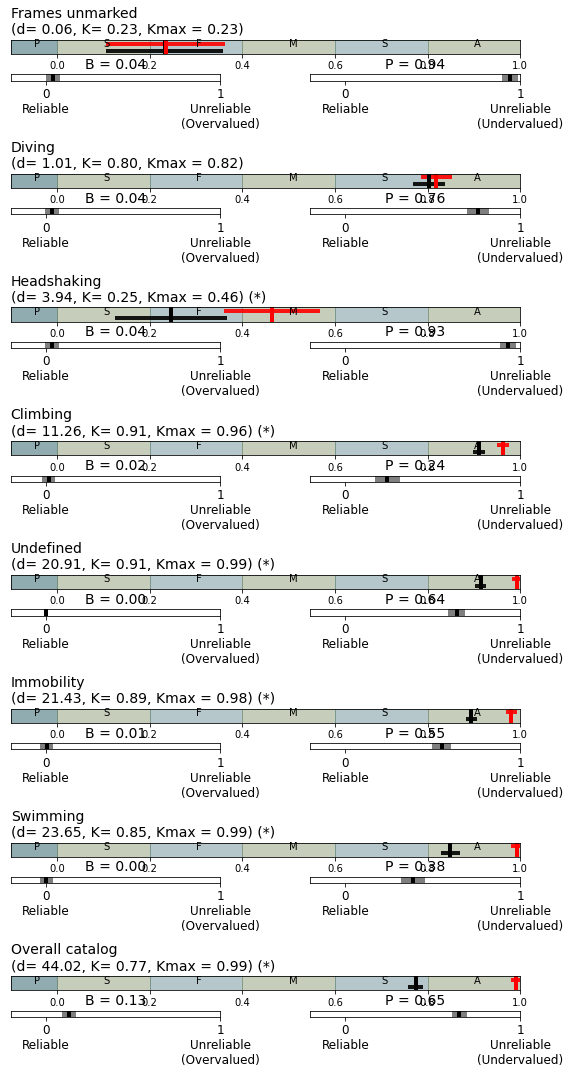

In [98]:
# def format_axes(fig):
#     for i, ax in enumerate(fig.axes):
#         ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
#         ax.tick_params(labelbottom=False, labelleft=False)


# gridspec inside gridspec
# fig = plt.figure(figsize=(5.5, 3.5))

fig = plt.figure()

fig.set_size_inches(8, 15)

gs0 = gridspec.GridSpec(8, 1, figure=fig)


plt.tight_layout(pad=0.4)
for i, cat in enumerate(ls_cat_ordenada, 0):
    gs00 = gs0[i].subgridspec(16, 9)
    
    kappa = fig.add_subplot(gs00[0:6, 0:])
    g_kappa_ax(kappa, cat)
    
    
#     plt.subplots_adjust( wspace=1, hspace=10)

    bias_lado = fig.add_subplot(gs00[13:, 0:4])
    g_vies_ax(bias_lado, cat)
    
    prevalence_baixo = fig.add_subplot(gs00[13:,5:])
    g_prevalencia_ax(prevalence_baixo, cat)
    
    
    



plt.subplots_adjust( wspace=1, hspace=1)
plt.tight_layout(pad=1)
# format_axes(fig)
# plt.savefig('teste.png',  bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('custom_hipotese.png', bbox_inches='tight')
plt.show()

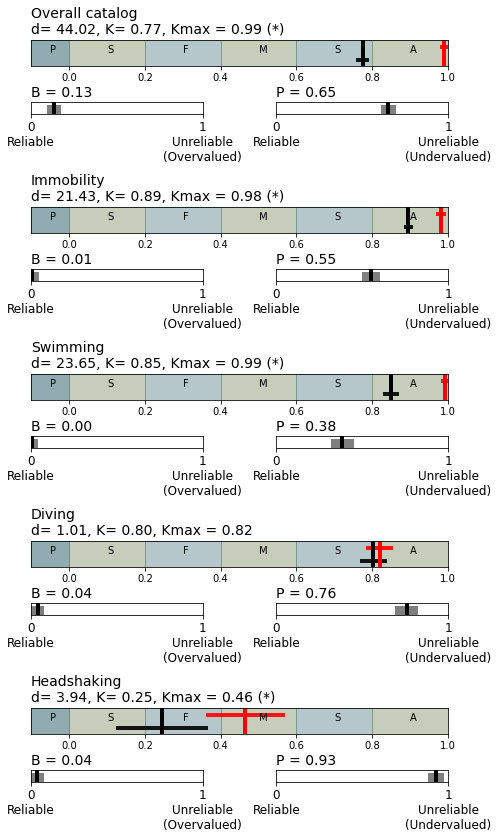

In [127]:
ls_custom = ['Catalog', 'Immobility', 'Swimming', 'Diving', 'Headshaking']


fig = plt.figure()

fig.set_size_inches(7, 18)

gs0 = gridspec.GridSpec(8, 1, figure=fig)


plt.tight_layout(pad=0.4)
for i, cat in enumerate(ls_custom, 0):
    gs00 = gs0[i].subgridspec(16, 9)
    
    kappa = fig.add_subplot(gs00[0:6, 0:])
    g_kappa_ax(kappa, cat)
    
    
#     plt.subplots_adjust( wspace=1, hspace=10)

    bias_lado = fig.add_subplot(gs00[13:, 0:4])
    g_vies_ax(bias_lado, cat)
    
    prevalence_baixo = fig.add_subplot(gs00[13:,5:])
    g_prevalencia_ax(prevalence_baixo, cat)
    
    
    



plt.subplots_adjust( wspace=1, hspace=1)
plt.tight_layout(pad=1)
# format_axes(fig)
# plt.savefig('teste.png',  bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('custom_hipotese_1.png', bbox_inches='tight')
plt.show()

In [36]:
# gs01 = gs0[1].subgridspec(3, 3)

# ax1 = fig.add_subplot(gs01[0:2, 0:2])
# ax2 = fig.add_subplot(gs01[0:2, 2])
# ax3 = fig.add_subplot(gs01[2, 0:2])



# gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[0])

# # ax1 = fig.add_subplot(gs00[:-1, :])
# # ax2 = fig.add_subplot(gs00[-1, :-1])
# # ax3 = fig.add_subplot(gs00[-1, -1])

# # the following syntax does the same as the GridSpecFromSubplotSpec call above:
# gs01 = gs0[1].subgridspec(3, 3)

# ax4 = fig.add_subplot(gs01[:, :-1])
# ax5 = fig.add_subplot(gs01[:-1, -1])
# ax6 = fig.add_subplot(gs01[-1, -1])

# gs01 = gs0[2].subgridspec(3, 3)

# ax4 = fig.add_subplot(gs01[:, :-1])
# ax5 = fig.add_subplot(gs01[:-1, -1])
# ax6 = fig.add_subplot(gs01[-1, -1])



# gs01 = gs0[3].subgridspec(3, 3)

# ax4 = fig.add_subplot(gs01[:, :-1])
# ax5 = fig.add_subplot(gs01[:-1, -1])
# ax6 = fig.add_subplot(gs01[-1, -1])

# plt.suptitle("GridSpec Inside GridSpec")

In [37]:

# fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
# spec = fig.add_gridspec(ncols=1, nrows=8)

# ax0 = fig.add_subplot(spec[0, 0])





# # fig.set_size_inches(7, 20)

# # for i, cat in enumerate(dic['ls_cat'], 0):
# #     axs = ax[i]
# #     fig, axd = plt.subplot_mosaic([['kappa', 'kappa', 'prevalence'],
# #                                ['kappa', 'kappa', 'prevalence'],
# #                                ['bias', 'bias', 'text']
                              
# #                               ],
# #                               figsize=(5.5, 3.5), constrained_layout=True)
# #     for k in axd:
# #         annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
    
# #     fig.suptitle('plt.subplot_mosaic()')
# #     axs = axd

In [38]:
# def cret_line(valor):
#     def creat_lvl(valor):
#         return lambda x: valor

#     return [creat_lvl(valor)(x) for x in range(2)]



# data['medido']['list_kappa_cat']

In [39]:
# data['medido']['list_kappa_cat_max']

In [40]:
# def get_cate_medida(data, cat, r_max):
#     def cre_fil_categoria(categoria):
#         return lambda x: categoria == x['categoria']

#     ls = []
#     if r_max:
#         ls = data['medido']['list_kappa_cat_max']
#     else:
#         ls = data['medido']['list_kappa_cat']
        
#     saida = list(filter(cre_fil_categoria(cat), ls ))
#     return saida[0]


# k = get_cate_medida(data, "Swimming", False)['kappa']
# k_max = get_cate_medida(data, "Swimming", True)['kappa']


In [41]:
# amax = get_descritor_catalogo(data, 'Swimming', 'kappa', False, True)
# ames = get_descritor_catalogo(data, 'Swimming', 'kappa', False, False)
# es.get_d_cohen(amax, ames)

In [42]:
# def cre_generate(i):
#     return [i, i + 0.5]

In [43]:
# cre_generate(2)

In [44]:
# fig, ax = plt.subplots()

# ax.plot([k, k], [1, 1.5], label = "Bootstrap Kappa", color= "green", linewidth=4.0)
# ax.plot([k_max, k_max], [1, 1.5], label = "Bootstrap Kappa", color= "yellow", linewidth=4.0)

In [45]:
# # get_lis_categoria(cat, 'kappa', False, True)
# # data['ls_cat_txt'][6] = "Undefined\n(frames that are not marked)"
# data['ls_cat_txt'][6]

In [46]:
# data['ls_cat_txt']

In [47]:
# data = get_dados(path)
# y_pos = []
# fig, ax = plt.subplots()
# fig.set_size_inches(7, 12)

# for i, cat in enumerate(data['ls_cat_txt'], 1):
#     amax = get_descritor_catalogo(data, cat, 'kappa', False, True)
#     ames = get_descritor_catalogo(data, cat, 'kappa', False, False)
    
#     confidence = 0.95
#     generate = cret_line(i)
#     con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
#     con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
    
    
#     d = es.get_d_cohen(amax, ames)
#     text = ax.text(1, 1, "d = {:.3f}\nCI K = [{:.3f}, {:.3f}]\nCI Kmax= [{:.3f}, {:.3f}]".format(d,
#                                                                                                    con_m[0], con_m[1],
#                                                                                                    con_max[0], con_max[1]),
#                                                                                                  fontsize=12, color='#a7e7ba')
#     text.set_position((-0.45, i + 0.12))
    
#     y_pos.append(i)

#     k = get_cate_medida(data, cat, False)['kappa']
#     k_max = get_cate_medida(data, cat, True)['kappa']
    
    
#     if(i==1):
#         ax.plot(con_m, generate, label = "CI Kappa (K)", color= "blue", linewidth=4.0, alpha=0.5)
#         ax.plot(con_max, generate, label = "CI max Kappa (Kmax)", color ="red", linewidth=4.0, alpha=0.5)
        
#         ax.plot([k, k], cre_generate(i), label = "Sample max Kappa", color= "green", linewidth=4.0)
#         ax.plot([k_max, k_max], cre_generate(i),label = "Sample max Kappa", color= "orange", linewidth=4.0)
        
#     else:
#         ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
#         ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)
        
#         ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
#         ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
        
        
        
        
        
        
# # codigo muito ruim        
# i = len(data['ls_cat_txt'] ) + 1
# amax = dt_max['kappa']
# ames = dt['kappa']
       
# confidence = 0.95
# generate = cret_line(i)
# con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
# con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
# print(con_m, con_max)
# d = es.get_d_cohen(amax, ames)
# text = ax.text(1, 1, "d = {:.3f}\nCI K = [{:.3f}, {:.3f}]\nCI Kmax= [{:.3f}, {:.3f}]".format(d,
#                                                                                                    con_m[0], con_m[1],
#                                                                                                    con_max[0], con_max[1]),
#                                                                                                  fontsize=11, color='#a7e7ba')
# text.set_position((-0.45, i + 0.12))

# y_pos.append(i)
# # axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# # axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")

# k     = data['medido']["catalogo_var"]['kappa']
# k_max = data['medido']["catalogo_var_max"]['kappa']     
        
# ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
# ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)

# ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
# ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
# # Eventualmente tem que limpar esse codigo
        
        
    
    
        
# ax.set_xlim([-0.5, 1.1])
# ax.axvspan(0, -0.5, alpha=0.6, color='#581845', label = "Poor (<0.00)")
# ax.axvspan(0, 0.2, alpha=0.4, color='#900C3F', label = "Sligh (0.00 - 0.20)")
# ax.axvspan(0.2, 0.4, alpha=0.4, color='#C70039', label = "Fair (0.21 - 0.40)")
# ax.axvspan(0.4, 0.6, alpha=0.4, color='#FF5733', label = "Moderate (0.41 - 0.6)")
# ax.axvspan(0.6, 0.8, alpha=0.4, color='#FFC300', label = "Substantial (0.61 - 0.8)")
# ax.axvspan(0.8, 1, alpha=0.4, color='#DAF7A6', label = "Almost perfect (0 - 1)")

# lgd = ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# # ax.legend()
# ax.set_yticks(y_pos)
# data['ls_cat_txt'][6] = "Undefined\n(frames that\naren't marked)"
# data['ls_cat_txt'].append("Catalog")
# ax.set_yticklabels(data['ls_cat_txt'], rotation=65)
# ax.set_xlabel("Cohen's Kappa")
# plt.savefig('catalogo categorias kappa.png',  bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()

In [48]:
# get_descritor_catalogo(data, 'Swimming', 'vies', False, True)

In [49]:
# get_descritor_catalogo(data, 'Immobility', 'vies', False, True)

In [50]:
# data = get_dados(path)
# y_pos = []
# fig, ax = plt.subplots()
# fig.set_size_inches(7, 12)

# dt =     es.get_descritores_max(False, data)
# dt_max = es.get_descritores_max(True, data)

# for i, cat in enumerate(data['ls_cat_txt'], 1):
#     amax = get_descritor_catalogo(data, cat, 'prevalencia', False, True)
#     ames = get_descritor_catalogo(data, cat, 'prevalencia', False, False)
    
#     confidence = 0.95
#     generate = cret_line(i)
#     con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
#     con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
#     print(con_m, con_max)
#     d = es.get_d_cohen(amax, ames)
#     text = ax.text(1, 1, "d = {:.3f}\nCI P = [{:.3f}, {:.3f}]\nCI Pmax= [{:.3f}, {:.3f}]".format(d,
#                                                                                                    con_m[0], con_m[1],
#                                                                                                    con_max[0], con_max[1]),
#                                                                                                  fontsize=11)
#     text.set_position((-0.45, i + 0.12))
    
#     y_pos.append(i)

#     k = get_cate_medida(data, cat, False)['prevalencia']
#     k_max = get_cate_medida(data, cat, True)['prevalencia']
    
    
#     if(i==1):
#         ax.plot(con_m, generate, label = "CI prevalence (P)", color= "blue", linewidth=4.0, alpha=0.5)
#         ax.plot(con_max, generate, label = "CI max prevalence (Pmax)", color ="red", linewidth=4.0, alpha=0.5)
        
#         ax.plot([k, k], cre_generate(i), label = "Sample prevalence", color= "green", linewidth=4.0)
#         ax.plot([k_max, k_max], cre_generate(i),label = "Sample max prevalence", color= "orange", linewidth=4.0)
        
#     else:
#         ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
#         ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)
        
#         ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
#         ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)


# # codigo muito ruim        
# i = len(data['ls_cat_txt'] ) + 1
# amax = dt_max['prevalencia']
# ames = dt['prevalencia']
       
# confidence = 0.95
# generate = cret_line(i)
# con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
# con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
# print(con_m, con_max)
# d = es.get_d_cohen(amax, ames)
# text = ax.text(1, 1, "d = {:.3f}\nCI P = [{:.3f}, {:.3f}]\nCI Pmax= [{:.3f}, {:.3f}]".format(d,
#                                                                                                    con_m[0], con_m[1],
#                                                                                                    con_max[0], con_max[1]),
#                                                                                                  fontsize=11)
# text.set_position((-0.45, i + 0.12))

# y_pos.append(i)
# # axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# # axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")

# k     = data['medido']["catalogo_var"]['prevalencia']
# k_max = data['medido']["catalogo_var_max"]['prevalencia']



# ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
# ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)

# ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
# ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
# # arrumar até aqui        
        
        
        




# ax.set_xlim([-0.5, 1.1])
# # ax.legend()
# lgd = ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# ax.set_yticks(y_pos)
# data['ls_cat_txt'][6] = "Undefined\n(frames that\naren't marked)"
# data['ls_cat_txt'].append("Catalog")
# ax.set_yticklabels(data['ls_cat_txt'], rotation=65)
# ax.set_xlabel("Prevalence")
# plt.savefig('prevalence kappa.png',  bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()

In [51]:
# amax = get_descritor_catalogo(data, cat, 'prevalencia', False, True)
# ames = get_descritor_catalogo(data, cat, 'prevalencia', False, False)
# print(amax)

In [52]:
# print(ames)

In [53]:
# def cr_f_categoria(categoria):
#     def filter_categoria(element):
#         return element['categoria'] == categoria
#     return filter_categoria

# def map_element(element):
#     return lambda x: x[element]
# #     def c_map(element):
# #         return element['list_kappa_cat']
# #     def c_map_2(element):
# #         return element
# # strin = ""
# # if(r_max):
# #     strin = "list_kappa_cat_max"
# # else:
# #     strin = "list_kappa_cat"

# # saida = []
# # if (r_medido):
# #     saida.append(list(filter(cr_f_categoria(categoria), data['medido'][strin]))[0])

# # else:
# saida = []
# for item in data['varios_kappa']:
#     saida.append(list(filter(cr_f_categoria('Swimming'), item['list_kappa_cat_max']))[0]) 


# #     print(saida)
# # saida = list(map(map_element('prevalencia'), saida))
# saida

In [54]:
# saida = []
# for item in data['varios_kappa']:
#     saida.append(list(filter(cr_f_categoria('Swimming'), item['list_kappa_cat']))[0]) 


# #     print(saida)
# # saida = list(map(map_element('prevalencia'), saida))
# saida

In [55]:
# data = get_dados(path)



# y_pos = []
# fig, ax = plt.subplots()
# fig.set_size_inches(7, 12)

# for i, cat in enumerate(data['ls_cat_txt'], 1):
#     amax = get_descritor_catalogo(data, cat, 'vies', False, True)
#     ames = get_descritor_catalogo(data, cat, 'vies', False, False)
    
#     confidence = 0.95
#     generate = cret_line(i)
#     con_m   = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
#     con_max = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
#     print(con_m, con_max)
#     d = es.get_d_cohen(amax, ames)
#     text = ax.text(1, 1, "d = {:.3f}\nCI B = [{:.3f}, {:.3f}]\nCI Bmax= [{:.3f}, {:.3f}]".format(d,
#                                                                                                    con_m[0], con_m[1],
#                                                                                                    con_max[0], con_max[1]),
#                                                                                                  fontsize=11)
#     text.set_position((0.3, i + 0.25))
    
#     y_pos.append(i)

#     k = get_cate_medida(data, cat, False)['vies']
#     k_max = get_cate_medida(data, cat, True)['vies']
    
    
#     if(i==1):
#         ax.plot(con_m, generate, label = "CI bias (B)", color= "blue", linewidth=4.0, alpha=0.5)
#         ax.plot(con_max, generate, label = "CI max bias (Bmax)", color ="red", linewidth=4.0, alpha=0.5)
        
#         ax.plot([k, k], cre_generate(i), label = "Sample bias", color= "green", linewidth=4.0)
#         ax.plot([k_max, k_max], cre_generate(i),label = "Sample max bias ", color= "orange", linewidth=4.0)
        
#     else:
#         ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
#         ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)
        
#         ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
#         ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)

        
#         # codigo muito ruim        
# i = len(data['ls_cat_txt'] ) + 1
# amax = dt_max['vies']
# ames = dt['vies']
       
# confidence = 0.95
# generate = cret_line(i)
# con_m   = np.percentile(amax,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
# con_max = np.percentile(ames,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])
# print(con_m, con_max)
# d = es.get_d_cohen(amax, ames)
# text = ax.text(1, 1, "d = {:.3f}\nCI B = [{:.3f}, {:.3f}]\nCI Bmax= [{:.3f}, {:.3f}]".format(d,
#                                                                                                    con_m[0], con_m[1],
#                                                                                                    con_max[0], con_max[1]),
#                                                                                                  fontsize=11)
# text.set_position((0.3, i + 0.25))

# y_pos.append(i)
# # axs[2].axvline(x=data['medido']["catalogo_var"]['kappa'], label="Kappa measured", color='red')
# # axs[2].axvline(x=data['medido']["catalogo_var_max"]['kappa'], label="Kappa max")

# k     = data['medido']["catalogo_var"]['vies']
# k_max = data['medido']["catalogo_var_max"]['vies']     
        
# ax.plot(con_m, generate, color= "blue", linewidth=4.0, alpha=0.5)
# ax.plot(con_max, generate, color ="red", linewidth=4.0, alpha=0.5)

# ax.plot([k, k], cre_generate(i) , color= "green", linewidth=4.0)
# ax.plot([k_max, k_max], cre_generate(i), color= "orange", linewidth=4.0)
# # Eventualmente tem que limpar esse codigo



# ax.set_xlim([-0.4, 1.1])
# lgd = ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
# ax.set_yticks(y_pos)
# data['ls_cat_txt'][6] = "Undefined\n(frames that\naren't marked)"
# data['ls_cat_txt'].append("Catalog")
# ax.set_yticklabels(data['ls_cat_txt'], rotation=65)
# ax.set_xlabel("Bias")
# plt.savefig('categorias vies.png',  bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()